## Bank Transaction Fraud Detection
Problem Statement
With the rapid growth of digital banking, fraudulent transactions have become a significant concern for financial institutions. The challenge is to build a robust system to detect and prevent fraudulent transactions in real-time while maintaining customer convenience and privacy.

The dataset provided contains detailed information about bank transactions, including customer demographics, transaction metadata, merchant categories, device types, transaction locations, and other relevant attributes. Key fields like transaction descriptions, device usage, and merchant categories provide vital insights for identifying anomalous activities. The "Is_Fraud" label offers a foundation for supervised learning techniques to differentiate between genuine and fraudulent transactions.

The objective of this problem is to analyze transaction patterns and develop predictive models that can accurately classify transactions as fraudulent or legitimate. This task involves exploring feature correlations, detecting unusual transaction behavior, and leveraging machine learning algorithms to create a scalable and efficient fraud detection system.

A successful solution will not only detect fraudulent activities but also minimize false positives, ensuring genuine transactions are not unnecessarily flagged. Insights derived from this analysis can help strengthen security measures, optimize fraud prevention strategies, and enhance the overall banking experience for customers.

# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearDiscriminantAnalysis as LDA, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
!pip install lightgbm
!pip install catboost

from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Bank_Transaction_Fraud_Detection.csv')
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

# Stage 2 - Data Preprocessing

In [7]:
df.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [8]:
df.isna().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [9]:
# Get a list of categorical columns in the dataframe
categorical_columns = df.select_dtypes(include=['object']).columns

# Check the unique values and their counts for each categorical column
for col in categorical_columns:
    print(f"Column: {col}")
    print("-" * 25)
    print(f"Unique values: {df[col].nunique()}")
    print(f"Unique values sample: {df[col].unique()[:10]}")  # Display a sample of unique values
    print("-" * 50)

Column: Customer_ID
-------------------------
Unique values: 200000
Unique values sample: ['d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e'
 '7c14ad51-781a-4db9-b7bd-67439c175262'
 '3a73a0e5-d4da-45aa-85f3-528413900a35'
 '7902f4ef-9050-4a79-857d-9c2ea3181940'
 '3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9'
 '6c870d65-76b0-431d-bdf3-9292998e8211'
 '5323737c-bbd2-423f-9c9b-e0433c8f75dc'
 'c0c3d474-f6c2-4c66-9b0e-f9ba75c6f310'
 'e9a82764-1253-4a46-ad34-80e3416fc801'
 '708224d5-192a-4d86-b411-8ec6d1bb274b']
--------------------------------------------------
Column: Customer_Name
-------------------------
Unique values: 142699
Unique values sample: ['Osha Tella' 'Hredhaan Khosla' 'Ekani Nazareth' 'Yamini Ramachandran'
 'Kritika Rege' 'Ishanvi Dar' 'Arya Shroff' 'Jackson Shere'
 'Bhanumati Ravel' 'Meera Ganesh']
--------------------------------------------------
Column: Gender
-------------------------
Unique values: 2
Unique values sample: ['Male' 'Female']
--------------------------------------------------


In [10]:
# If a column has only one unique value, it won't be useful for prediction.
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with only one unique value:", single_value_columns)

# Dropping columns with one unique value
df = df.drop(columns=single_value_columns)

Columns with only one unique value: ['Transaction_Currency']


In [11]:
# Droping the columns which are not useful for the model evaluation
df = df.drop(columns=['Customer_Contact', 'Customer_Email', 'Customer_Name', 'Customer_ID', 'Transaction_ID', 'Merchant_ID'])
print(df.shape)

(200000, 17)


# Stage 3 - Exploratory Data Analysis (EDA)


In [13]:
# For numerical columns, we'll fill missing values with the median of each column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

print(numerical_columns)

Index(['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud'], dtype='object')


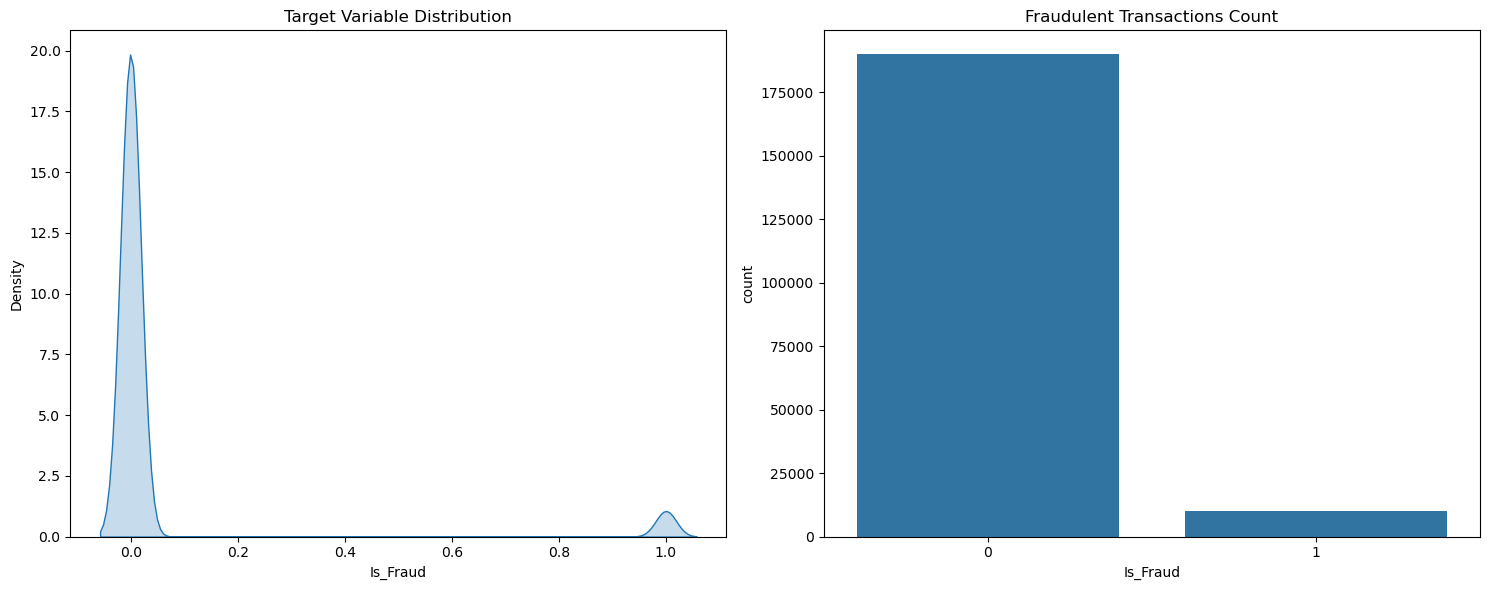

In [14]:
# Create a figure with 2 subplots in a horizontal row
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# KDE plot for the 'Is_Fraud' column (on the first subplot)
sns.kdeplot(df["Is_Fraud"], fill=True, ax=axes[0])
axes[0].set_title('Target Variable Distribution')

# Count plot for the 'Is_Fraud' column (on the second subplot)
sns.countplot(x='Is_Fraud', data=df, ax=axes[1])
axes[1].set_title('Fraudulent Transactions Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

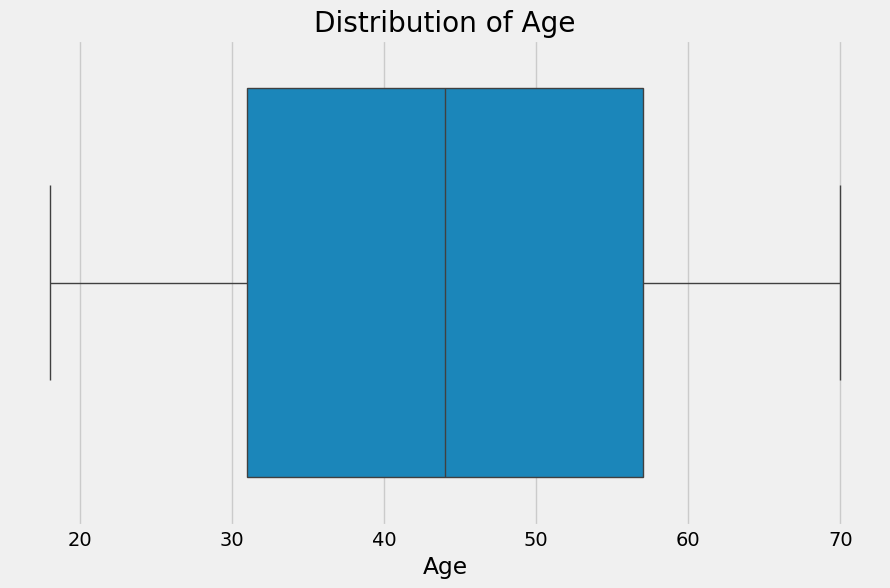

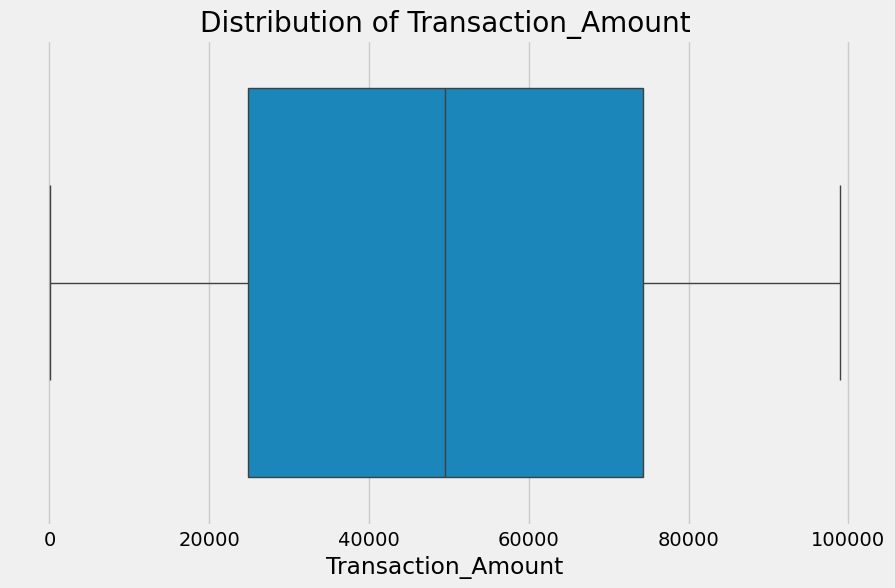

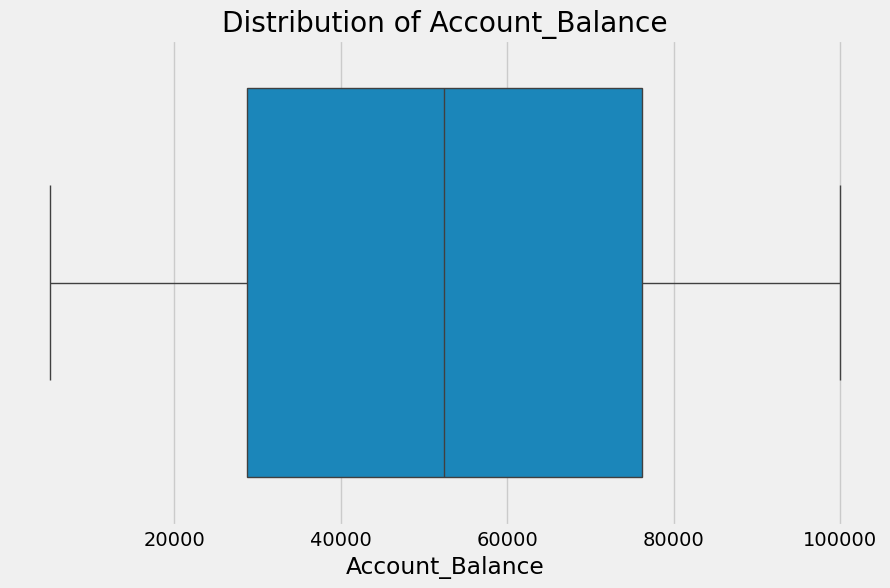

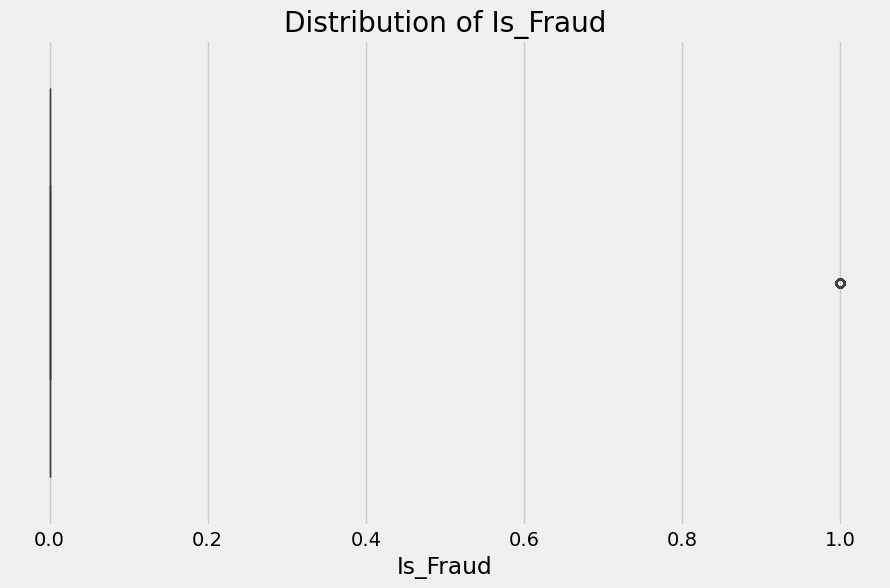

In [15]:
# Loop through each numerical column in your DataFrame
for col in numerical_columns:
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10, 6))
    
    # Create the boxplot
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    
    # Show the plot
    plt.show()

In [16]:
# For categorical columns, we'll fill missing values with the mode (most frequent category)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    
print(categorical_columns)


Index(['Gender', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Date', 'Transaction_Time', 'Transaction_Type',
       'Merchant_Category', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Transaction_Description'],
      dtype='object')


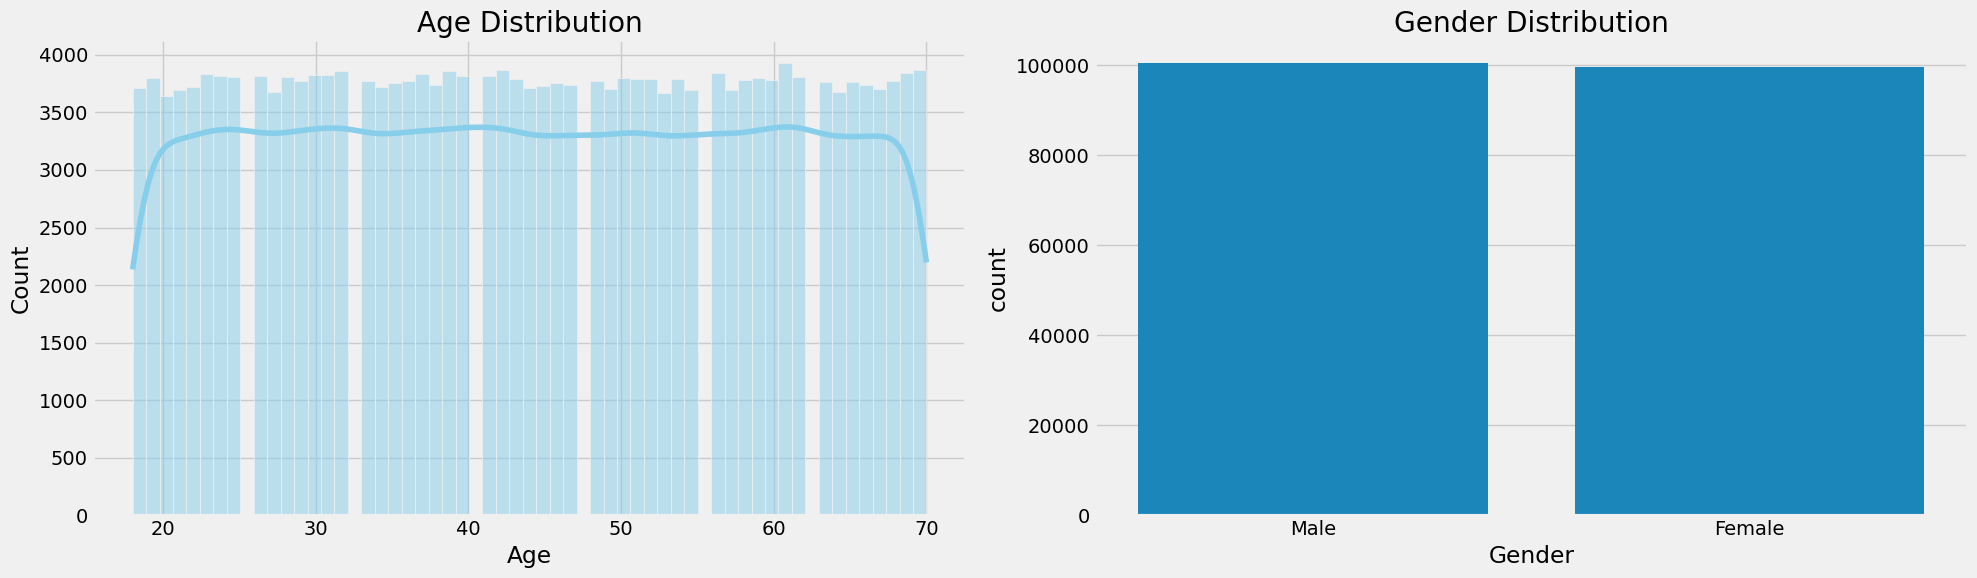

In [18]:
# Create a figure with 4 subplots in a horizontal row
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 4 columns

# Histogram for the 'Age' column (on the third subplot)
sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

# Count plot for the 'Gender' column (on the fourth subplot)
sns.countplot(x='Gender', data=df, ax=axes[1])
axes[1].set_title('Gender Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


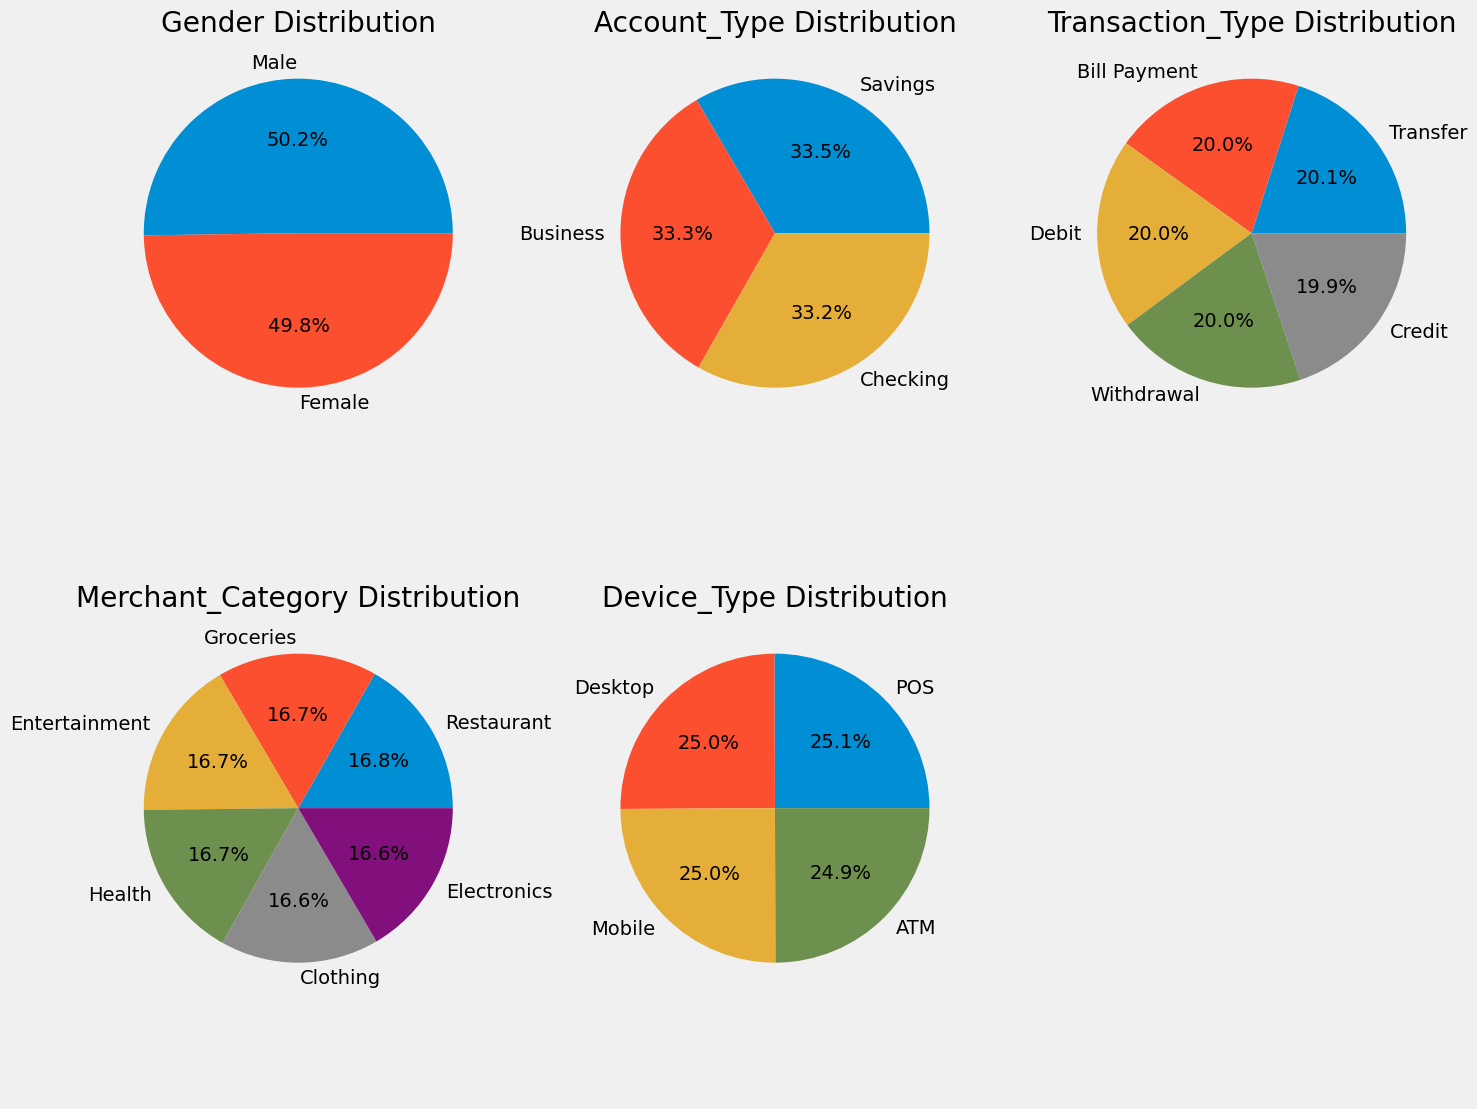

In [19]:
# Calculate the number of rows needed based on the number of charts
num_cols = 3  # Number of charts per row
# num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate rows required for all charts
num_rows = 2 # Number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))  # Adjust figure size for more rows

# Flatten the axes array for easier iteration
axes = axes.flatten()

ax_index = 0
for col in categorical_columns:
    unique_values = df[col].nunique()
    if unique_values < 10:  # Only plot if unique values are less than 10
        # Plot on the respective subplot
        ax = axes[ax_index]
        ax.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%')
        ax.set_title(f'{col} Distribution')
        
        # Move to the next subplot
        ax_index += 1

# Hide any unused subplots (in case there are fewer than `num_rows * num_cols` charts)
for i in range(ax_index, len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


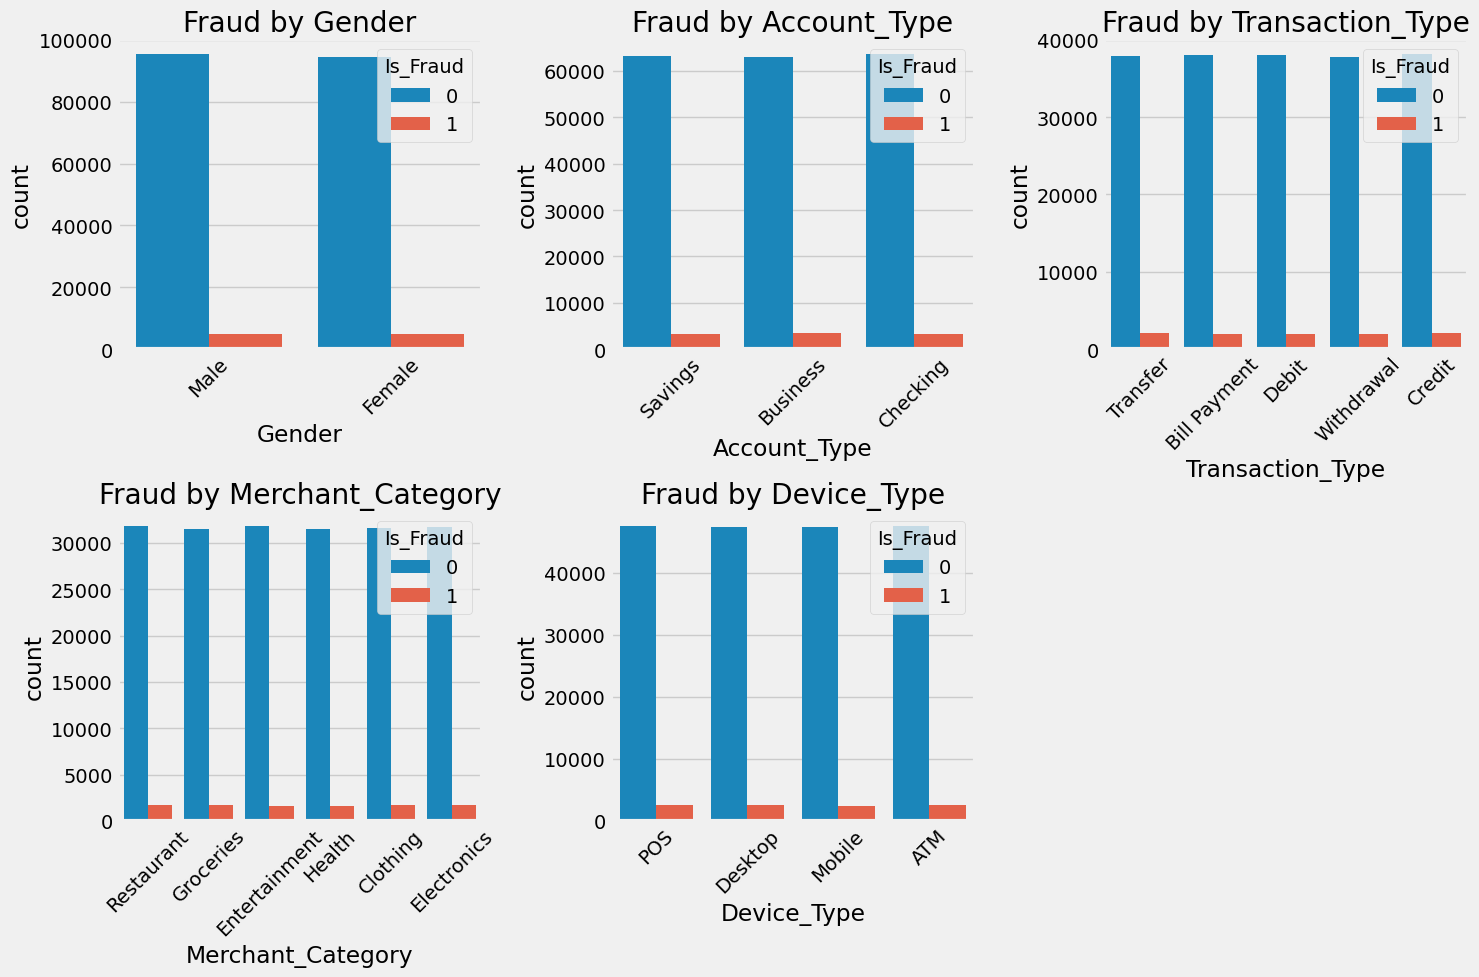

\Fraud Rate by Categories:

Gender Analysis:
Gender
Female    5.0
Male      5.1
Name: Is_Fraud, dtype: float64

Account_Type Analysis:
Account_Type
Business    5.2
Checking    4.9
Savings     5.0
Name: Is_Fraud, dtype: float64

Transaction_Type Analysis:
Transaction_Type
Bill Payment    4.9
Credit          5.1
Debit           5.1
Transfer        5.2
Withdrawal      4.9
Name: Is_Fraud, dtype: float64

Merchant_Category Analysis:
Merchant_Category
Clothing         5.2
Electronics      5.0
Entertainment    4.8
Groceries        5.2
Health           5.0
Restaurant       5.0
Name: Is_Fraud, dtype: float64

Device_Type Analysis:
Device_Type
ATM        5.0
Desktop    5.1
Mobile     5.0
POS        5.1
Name: Is_Fraud, dtype: float64


In [24]:
# Filter categorical columns with less than 20 unique values
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if df[col].nunique() < 20]

# Set the number of charts per row and rows
num_cols = 3  # Number of charts per row
num_rows = 2  # Number of rows

# Calculate the total number of subplots needed
total_plots = len(categorical_cols)

# Create a figure with the appropriate number of rows and columns
plt.figure(figsize=(15, 5 * num_rows))

# Plot the count plots for the filtered categorical columns
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=df, x=col, hue='Is_Fraud') 
    plt.title(f'Fraud by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate churn rate by categories
print("\Fraud Rate by Categories:")
for col in categorical_cols:
    print(f"\n{col} Analysis:")
    print(df.groupby(col)['Is_Fraud'].mean().round(3) * 100)
    

# Stage 4 - Convert Date Time Columns to Numerical Columns

In [27]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d-%m-%Y')
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S')

In [30]:
 #Extract new features from 'Transaction_Date' and 'Transaction_Time'
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Month'] = df['Transaction_Date'].dt.month
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Hour'] = df['Transaction_Time'].dt.hour
df['Transaction_Minute'] = df['Transaction_Time'].dt.minute
df['Transaction_Second'] = df['Transaction_Time'].dt.second

In [32]:
# Drop 'Transaction_Date' and 'Transaction_Time' columns after feature extraction
df = df.drop(columns=['Transaction_Date', 'Transaction_Time'])

In [33]:
# If a column has only one unique value, it won't be useful for prediction.
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with only one unique value:", single_value_columns)

# Dropping columns with one unique value
df = df.drop(columns=single_value_cols)

Columns with only one unique value: ['Transaction_Currency']


In [34]:
# For numerical columns, updating after conversion
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns ::", numerical_columns)
print("-"*50)
# For categorical columns, updating after conversion
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns ::", categorical_columns)

Numerical Columns :: Index(['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud'], dtype='object')
--------------------------------------------------
Categorical Columns :: Index(['Gender', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Type', 'Merchant_Category', 'Transaction_Device',
       'Transaction_Location', 'Device_Type', 'Transaction_Description'],
      dtype='object')


In [46]:
df.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Transaction_Day,Transaction_Hour,Transaction_Minute,Transaction_Second
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,Bitcoin transaction,23,16,4,7
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,Grocery delivery,11,17,14,53
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,Mutual fund investment,25,3,9,52
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,Food delivery,19,12,27,2
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,Debt repayment,30,18,30,46


# Stage 5 - Encoding

In [49]:
# Initializing the LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

## Stage 6 - Visualize Fraud Patterns and Distribution of Features

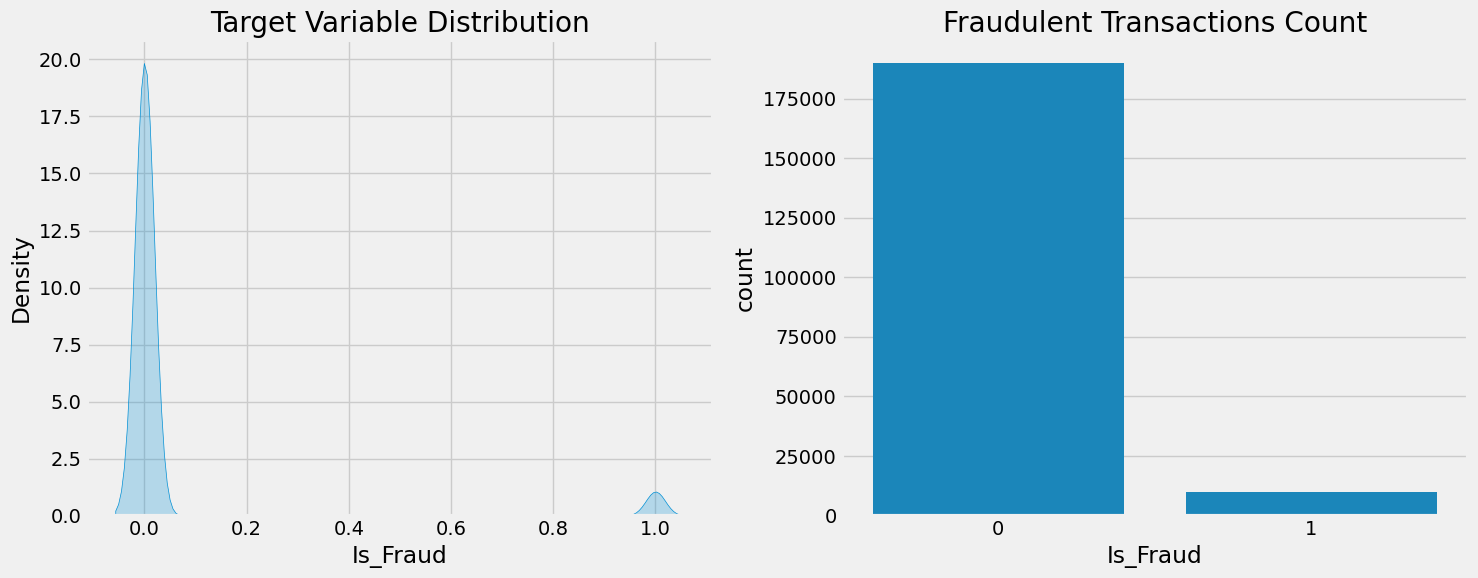

In [52]:
# Create a figure with 2 subplots in a horizontal row
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# KDE plot for the 'Is_Fraud' column (on the first subplot)
sns.kdeplot(df["Is_Fraud"], fill=True, ax=axes[0])
axes[0].set_title('Target Variable Distribution')

# Count plot for the 'Is_Fraud' column (on the second subplot)
sns.countplot(x='Is_Fraud', data=df, ax=axes[1])
axes[1].set_title('Fraudulent Transactions Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

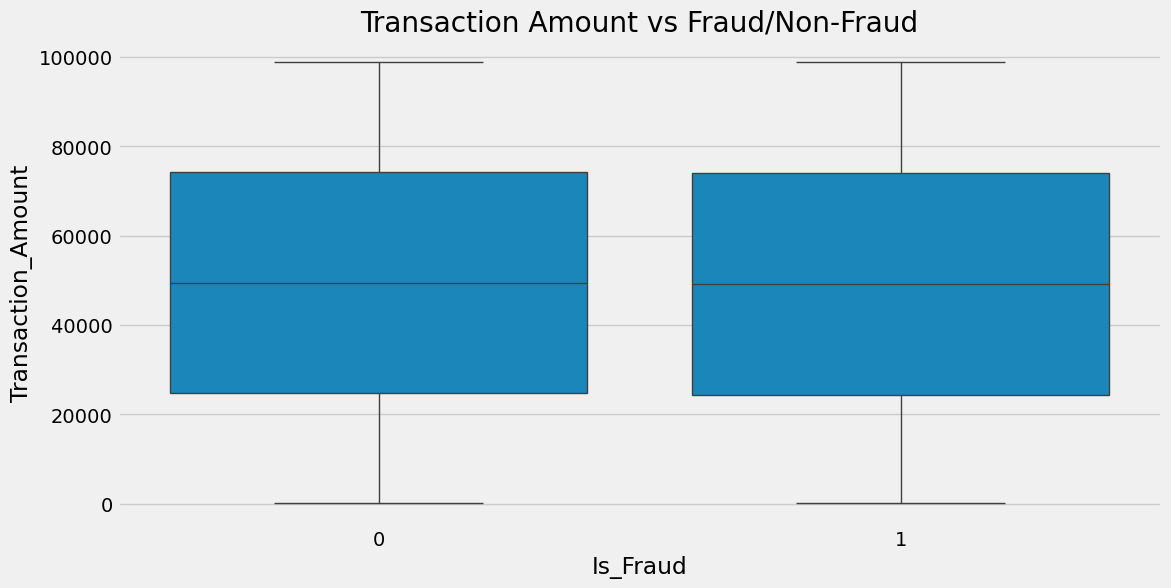

In [53]:
# Visualize fraud transactions based on 'Transaction_Amount'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Is_Fraud', y='Transaction_Amount', data=df)
plt.title("Transaction Amount vs Fraud/Non-Fraud")
plt.show()


# Stage 7 - Plot Correlation Matrix to Understand Feature Relationships

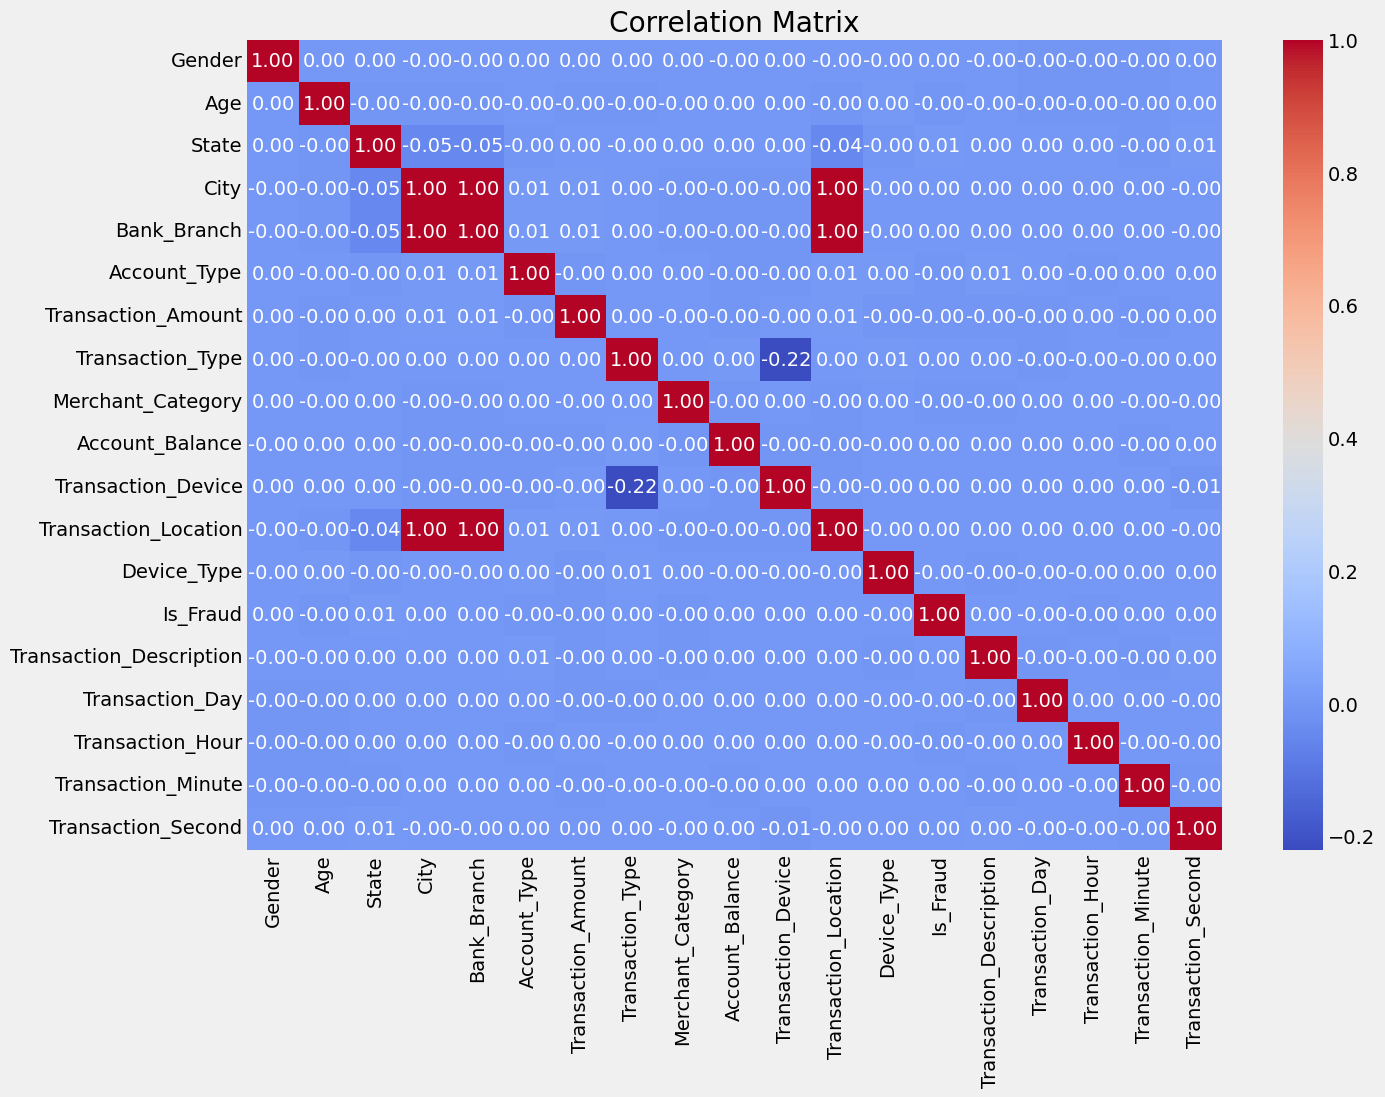

In [56]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

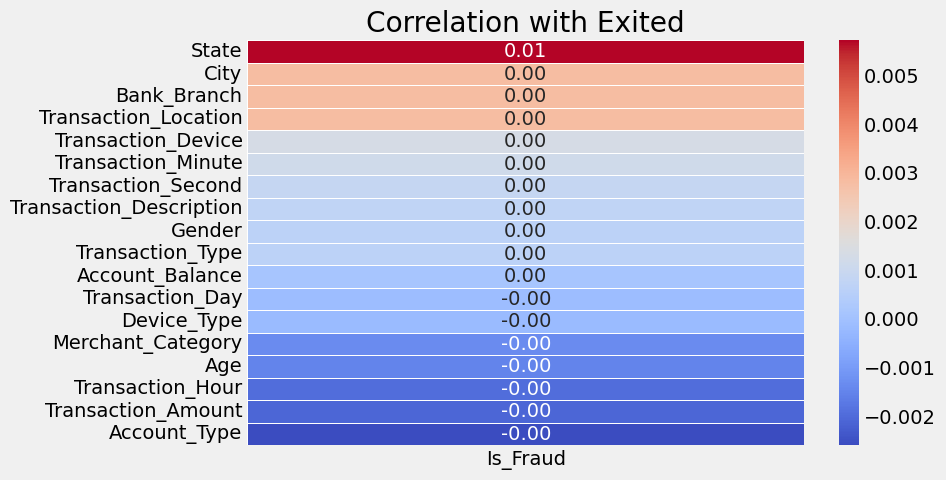

In [58]:
# Calculate correlation matrix for numerical columns
correlation_matrix = df.corr()

# Extract correlation with 'Exited' and drop 'Exited' itself
correlation_price = correlation_matrix['Is_Fraud'].sort_values(ascending=False).drop('Is_Fraud')

# Plot the heatmap for the correlation with 'Exited'
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_price.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with Exited')
plt.show()

## Stage 8 - Feature Importance using Random Forest

In [61]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
X = df.drop(columns=['Is_Fraud'])
y = df['Is_Fraud']

In [64]:
print("Shape for X Dataframe: ", X.shape)
print("Columns for X Dataframe: ", X.columns)
print("-"*50)
print("Shape for y Dataframe: ", y.shape)

Shape for X Dataframe:  (200000, 18)
Columns for X Dataframe:  Index(['Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Amount', 'Transaction_Type', 'Merchant_Category',
       'Account_Balance', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Transaction_Description', 'Transaction_Day',
       'Transaction_Hour', 'Transaction_Minute', 'Transaction_Second'],
      dtype='object')
--------------------------------------------------
Shape for y Dataframe:  (200000,)


In [66]:
# Train the model
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [67]:
# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)


<Figure size 1200x800 with 0 Axes>

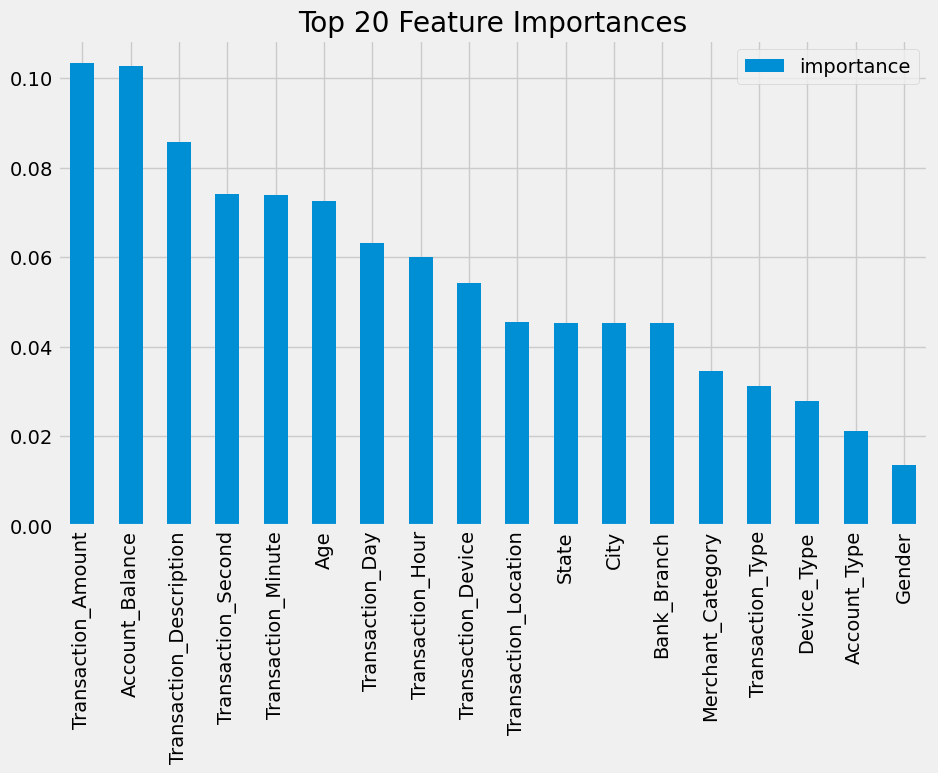

In [68]:
# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.head(20).plot(kind='bar', figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.show()

In [69]:
# Select features with importance greater than a threshold (e.g., 0.01)
important_features = feature_importances[feature_importances['importance'] > 0.01].index
X = df[important_features]
print("Shape for X Dataframe: ", X.shape)
print("Columns for X Dataframe: ", X.columns)

Shape for X Dataframe:  (200000, 18)
Columns for X Dataframe:  Index(['Transaction_Amount', 'Account_Balance', 'Transaction_Description',
       'Transaction_Second', 'Transaction_Minute', 'Age', 'Transaction_Day',
       'Transaction_Hour', 'Transaction_Device', 'Transaction_Location',
       'State', 'City', 'Bank_Branch', 'Merchant_Category', 'Transaction_Type',
       'Device_Type', 'Account_Type', 'Gender'],
      dtype='object')


## Train test split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature scaling

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Defining the models

In [75]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': cb.CatBoostClassifier(silent=True),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'KNN': KNeighborsClassifier()
    # 'SVM (RBF)': SVC(kernel='rbf', probability=True),
    # 'SVM (Linear)': LinearSVC(),
    # 'GaussianNB': GaussianNB()
    # 'LDA': LDA(),
    # 'QDA': QuadraticDiscriminantAnalysis(),
    # 'Ridge Classifier': RidgeClassifier(),
}

In [76]:
# Define reduced parameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1],
        'solver': ['liblinear'],
        'penalty': ['l2']
    },
    'Decision Tree': {
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [10],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    },
    'Gradient Boosting': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [5]
    },
    'XGBoost': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [5],
        'subsample': [0.8, 1.0]
    },
    'SVM (RBF)': {
        'C': [1, 10],
        'gamma': ['scale', 'auto']
    },
    'SVM (Linear)': {
        'C': [1, 10],
    },
    'LightGBM': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3, 5],
    },
    'CatBoost': {
        'iterations': [100],
        'learning_rate': [0.1],
        'depth': [3, 5]
    },
    'KNN': {
        'n_neighbors': [3],
        'weights': ['uniform', 'distance']
    },
    'AdaBoost': {
        'n_estimators': [100],
        'learning_rate': [0.01, 0.1]
    },
    'Bagging': {
        'n_estimators': [100],
        'max_samples': [0.8, 1.0]
    },
    'LDA': {},
    'QDA': {},
    'Ridge Classifier': {
        'alpha': [0.1, 1]
    },
    'GaussianNB': {}
}

In [77]:
# Initialize an empty dictionary to store results
model_results = {}

# Handle class imbalance by computing class weights for each model that supports it
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("class_weight_dict: ", class_weight_dict)

# Handle SMOTE for class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Evaluate models with GridSearchCV
for model_name, model in models.items():
    print(f"Training model with GridSearchCV: {model_name}")
    
    # Get the parameter grid for the model
    param_grid = param_grids[model_name]
    
    # Modify model to include class weights where applicable
    if model_name in ['Logistic Regression', 'Random Forest', 'SVM (RBF)', 'SVM (Linear)']:
        # Assign class weights for models that support it
        if model_name == 'Logistic Regression':
            model = LogisticRegression(class_weight='balanced')
        elif model_name == 'Random Forest':
            model = RandomForestClassifier(class_weight='balanced')
        elif model_name in ['SVM (RBF)', 'SVM (Linear)']:
            model = SVC(probability=True, class_weight='balanced') if model_name == 'SVM (RBF)' else LinearSVC(class_weight='balanced')

    # Perform GridSearchCV with parallelism
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    
    # Fit the model with the best parameters using the resampled data
    grid_search.fit(X_train_smote, y_train_smote)
    
    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    # Predict on both train and test sets
    y_train_pred = best_model.predict(X_train_smote)
    y_test_pred = best_model.predict(X_test_scaled)
    
    # Store the results
    model_results[model_name] = {
        'train_accuracy': best_model.score(X_train_smote, y_train_smote),
        'test_accuracy': best_model.score(X_test_scaled, y_test),
        'y_test': y_test,
        'y_test_pred': y_test_pred,
        'classification_report': classification_report(y_test, y_test_pred),
        'roc_auc': roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
    }


class_weight_dict:  {0: 0.5264647235731161, 1: 9.946537361680965}
Training model with GridSearchCV: Logistic Regression
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Training model with GridSearchCV: Decision Tree
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training model with GridSearchCV: Random Forest
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training model with GridSearchCV: Gradient Boosting
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Training model with GridSearchCV: XGBoost
Fitting 3 folds for each of 2 candidates,

## All model results and accuracy

In [97]:
# Print all accuracy results from the model_results dictionary
for model_name, results in model_results.items():
    print(f"{model_name} - Train Accuracy: {results['train_accuracy']:.4f}, Test Accuracy: {results['test_accuracy']:.4f}")

Logistic Regression - Train Accuracy: 0.5111, Test Accuracy: 0.5096
Decision Tree - Train Accuracy: 0.8582, Test Accuracy: 0.9469
Random Forest - Train Accuracy: 0.8575, Test Accuracy: 0.8592
Gradient Boosting - Train Accuracy: 0.9527, Test Accuracy: 0.9489
XGBoost - Train Accuracy: 0.9472, Test Accuracy: 0.9489
LightGBM - Train Accuracy: 0.9520, Test Accuracy: 0.9489
CatBoost - Train Accuracy: 0.9497, Test Accuracy: 0.9489
AdaBoost - Train Accuracy: 0.7338, Test Accuracy: 0.6769
Bagging - Train Accuracy: 1.0000, Test Accuracy: 0.9487
KNN - Train Accuracy: 1.0000, Test Accuracy: 0.7367


## Conclusion
# High Test Accuracy
The model achieved a high test accuracy, indicating its ability to correctly predict the majority of instances in the test set. This is an encouraging result and demonstrates the model's potential for reliable predictions under certain conditions.

# ROC AUC Score
Despite the high accuracy, the ROC AUC score is approximately 0.5, which is equivalent to random guessing. This suggests that the model struggles to effectively distinguish between the two classes, particularly the minority class. The low ROC AUC highlights poor discriminative power, which limits the model’s utility for nuanced classification tasks.

# Class Imbalance Analysis
The classification report reveals a significant class imbalance:

# Class 0 (Majority Class): The model performs exceptionally well on class 0, with a precision of 0.95, recall of 1.00, and an F1-score of 0.97. This indicates that predictions for the majority class are highly accurate and consistent.

# Class 1 (Minority Class): In stark contrast, the model struggles with class 1, showing extremely low precision (0.02), recall (0.00), and an F1-score of 0.00. This underscores its inability to correctly identify or predict instances of the minority class.

# Impact of Class Imbalance
The poor performance on class 1 suggests that the model is biased toward predicting the majority class (class 0). This bias is further evidenced by the low recall and precision for class 1, making it unreliable for tasks where identifying minority-class instances is critical.

# Recommendations for Improvement
Address Class Imbalance
To improve performance on the minority class, consider implementing techniques such as:

Resampling Methods: Oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) or undersampling can help balance the dataset.

Class Weight Adjustment: Assigning higher weights to minority-class samples during training can reduce bias toward the majority class.

Balanced Metrics: Focus on metrics like F1-score or precision-recall curves for the minority class to better evaluate performance.

# Model Tuning
Exploring alternative models or optimizing hyperparameters may help achieve better balance across both classes. Algorithms such as ensemble methods or tree-based models often handle imbalanced datasets more effectively.

# Final Remarks
While the model demonstrates strong overall accuracy and performs exceptionally well on the majority class, its inability to detect and predict instances of the minority class significantly limits its reliability in real-world applications where both classes are important.

The discrepancy between training and testing accuracy suggests mild overfitting, which should be monitored during further optimization efforts.

To enhance robustness and fairness across all categories, addressing class imbalance should be prioritized through resampling techniques, weighting adjustments, or exploring alternative models better suited for skewed distributions.

By focusing on these improvements, the model can evolve into a more balanced and effective solution capable of performing well across all classes.